In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

births = pd.read_csv('births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
#기존 데이터에 decade 속성을 추가. 추후 연산은 이걸 기반으로 작동
#births.head()
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
#aggfunc sum을 통해 합침

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [5]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


Text(0, 0.5, 'total births per year')

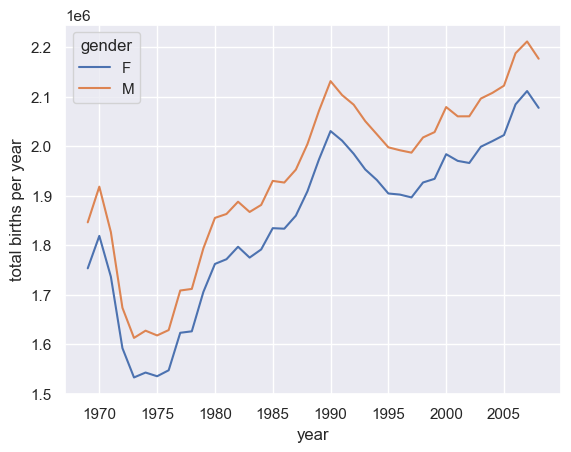

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

Text(0, 0.5, 'total births by day')

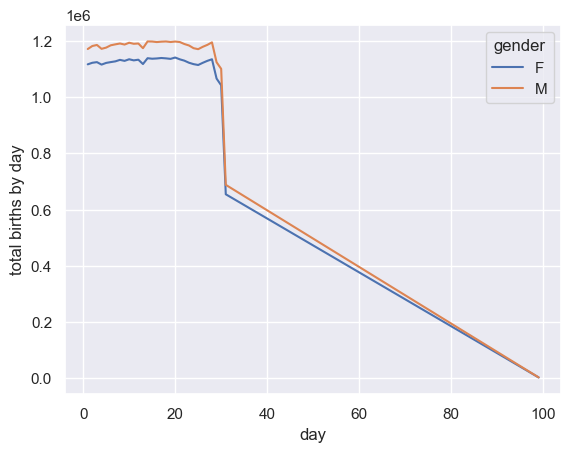

In [7]:
## 정제되지 않은 데이터임을 확인할 수 있음
## 위의 코드를 아주 약간만 변형하여 매 날마다 태어난 아이의 수 계산. 의미는 없는 값임

%matplotlib inline
sns.set()
births.pivot_table('births', index='day', columns='gender', aggfunc='sum').plot()
#births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births by day')

C:\Users\Junepay\AppData\Local\Temp\ipykernel_10864\3781305932.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean births by day')

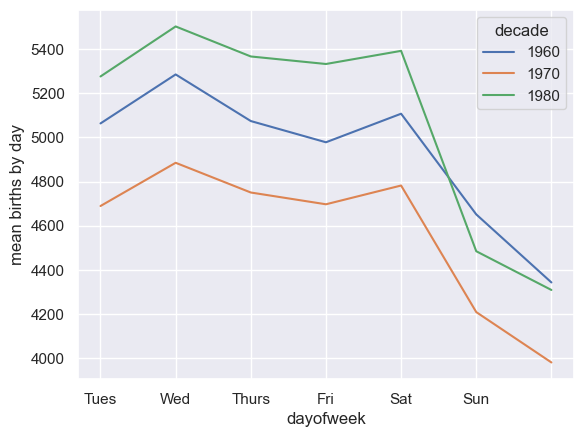

In [10]:
#https://stackoverflow.com/questions/45666970/what-is-sigma-clipping-how-do-you-know-when-to-apply-it
# 상세한 설명은 해당 링크에서 적혀있다.
# 일단 3분위수 - 1분위수를 하는 이유는, 저걸 뺀 값이 표준편차 비슷하게 기능하기 때문
# 0.74를 곱하는 이유는 0.37 시그마가 25%이기 때문


quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [11]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\Junepay\AppData\Local\Temp\ipykernel_10864\2180590905.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


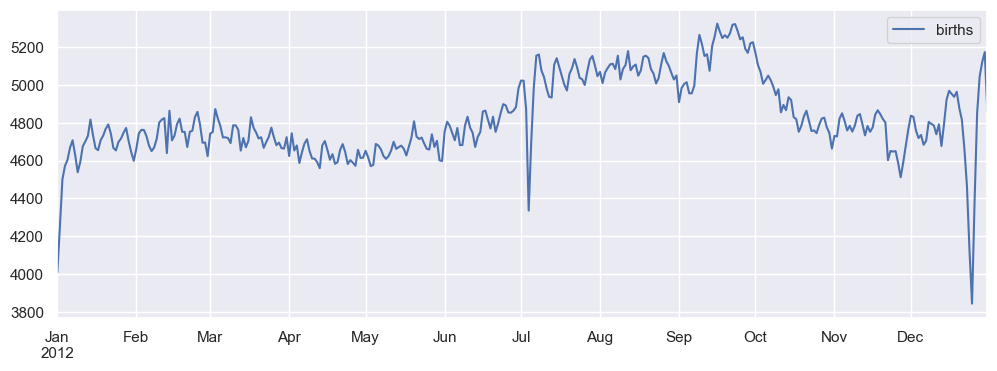

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);